# Week 8: High Frequency Words

##### Jimmy Ng & Corey Arnouts

Oct 16, 2020

### Questions 
1. Choose a corpus of interest.

2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

3. Taking the most common words, how many unique words represent half of the total words in the corpus?

4. Identify the 200 highest frequency words in this corpus.

5. Create a graph that shows the relative frequency of these 200 words.

6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## 0. Set up

In [1]:
import nltk 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\myvio\Anaconda3\envs\sps620env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## 1. Choose a corpus of interest.

We decide to get free access from the Gutenberg library and work on the popular novel "Emma" by Jane Austen.

In [2]:
from nltk.corpus import gutenberg
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\myvio\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

## 2. How many total unique words are in the corpus?

### total number of words

In [5]:
len(emma)

192427

### unique count of words that are alphabetic characters

In [6]:
len(set(w.lower() for w in emma if w.isalpha()))

7079

### let's explore a bit more by looking at frequency distribution of words by length

In [7]:
wAll = [len(w) for w in emma if w.isalpha()]
fdist_all = nltk.FreqDist(wAll)

{k: v for k, v in sorted(fdist_all.items(), reverse = False)} 

{1: 7317,
 2: 30785,
 3: 37795,
 4: 30650,
 5: 16804,
 6: 11593,
 7: 9967,
 8: 5856,
 9: 5389,
 10: 2742,
 11: 1353,
 12: 792,
 13: 409,
 14: 97,
 15: 38,
 16: 6,
 17: 7}

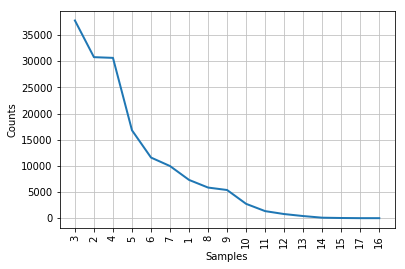

In [8]:
fdist_all.plot()

The most used words have length of 3, 2 and 4.

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [9]:
wAll = [w for w in emma if w.isalpha()]
mostCommon = nltk.FreqDist(wAll)

print(mostCommon)

<FreqDist with 7535 samples and 161600 outcomes>


In [10]:
commonDf = pd.DataFrame(mostCommon.most_common(100))
print(commonDf.head(100))

          0     1
0        to  5183
1       the  4844
2       and  4672
3        of  4279
4         I  3178
..      ...   ...
95      who   281
96  herself   279
97      now   273
98     time   272
99      can   270

[100 rows x 2 columns]


In [11]:
commonDf.columns = ['word', 'freq']
commonDf['cumulative_freq'] = np.cumsum(commonDf['freq'])
num = (commonDf['cumulative_freq'] >= (161600/2)).idxmax()

print(f'{num} of the most common words make up half of the total words in Emma.')

65 of the most common words make up half of the total words in Emma.


## 4. Identify the 200 highest frequency words in this corpus.

In [12]:
mostCommon.most_common(200)

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301),
 ('is', 1220),
 ('with', 1187),
 ('Mr', 1153),
 ('very', 1151),
 ('but', 1148),
 ('his', 1088),
 ('at', 997),
 ('s', 933),
 ('so', 924),
 ('Emma', 865),
 ('all', 835),
 ('could', 825),
 ('would', 815),
 ('been', 759),
 ('him', 758),
 ('Mrs', 699),
 ('on', 677),
 ('any', 651),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 591),
 ('do', 580),
 ('must', 564),
 ('me', 564),
 ('She', 562),
 ('will', 559),
 ('by', 558),
 ('which', 552),
 ('from', 535),
 ('Harriet', 506),
 ('or', 490),
 ('said', 484),
 ('much', 478),
 ('more', 464),
 ('an', 452),
 ('are', 447),
 ('He', 441),
 ('such', 440),
 ('Weston', 439),
 ('what', 434),
 ('them', 432),
 ('am', 422),
 ('there', 420),
 ('this',

## 5. Create a graph that shows the relative frequency of these 200 words.

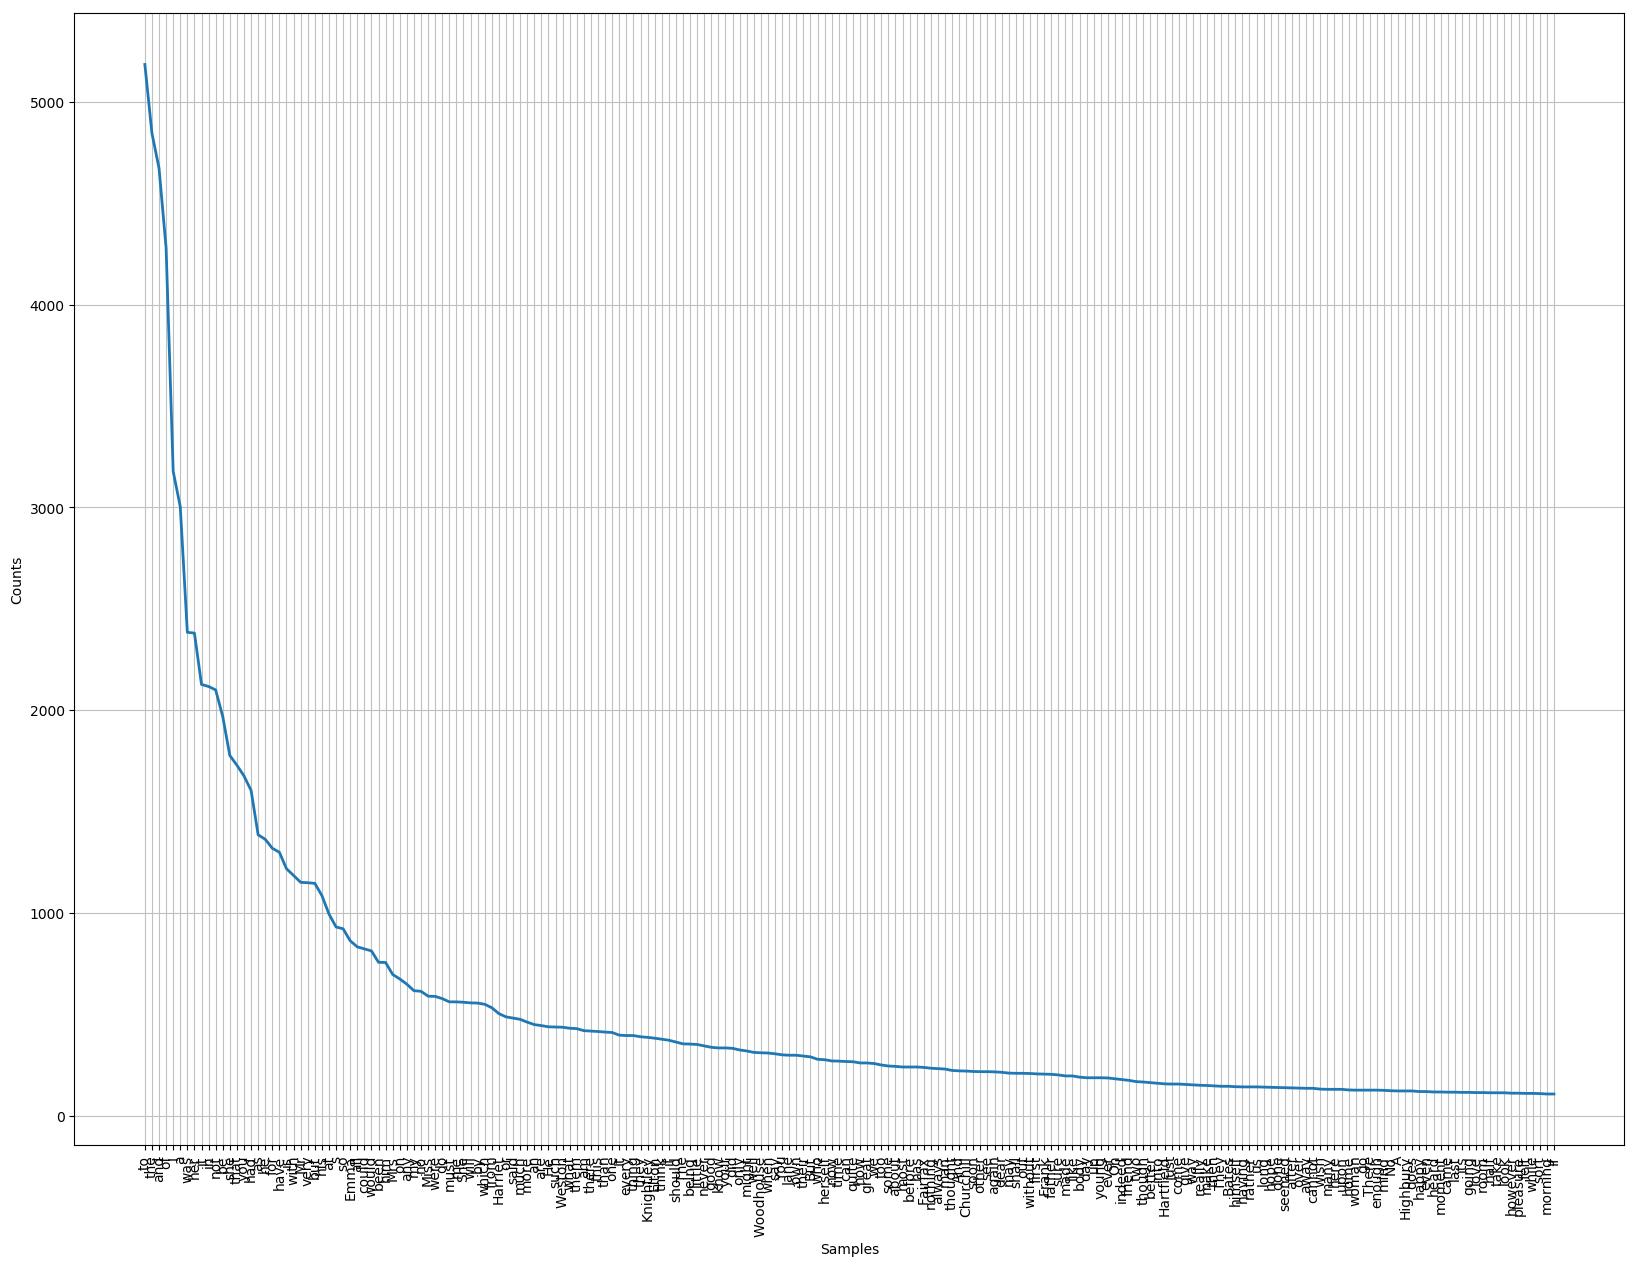

In [13]:
fig = plt.figure(figsize = (20, 15), dpi = 100, facecolor = 'w', edgecolor = 'k')
mostCommon.plot(200, cumulative = False)